# Mood Mirror

Una aplicación en Python que permite al usuario ingresar un texto libre, como una entrada de diario, y ofrece:

- La emoción principal (por ejemplo, alegría, tristeza, enojo, miedo, sorpresa).
- Un mensaje personalizado según la emoción detectada.
- Un gráfico que muestra cómo varían tus emociones a lo largo del tiempo.


---

### Importaciones

In [2]:
import pandas as pd
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


### Contamos las filas
Hacemos esto para saber los datos y para poder cumplir con la consigna

In [ ]:
for split in ["train", "val", "test"]:
    path = f"{split}.txt"
    df_split = pd.read_csv(path, sep=";", header=None, names=["text","emotion"])

    print(f"--- {split.upper()} ---")
    print("Total ejemplos:", len(df_split))
    print(df_split["emotion"].value_counts(), "\n")

--- TRAIN ---
Total ejemplos: 16000
emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64 

--- VAL ---
Total ejemplos: 2000
emotion
joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: count, dtype: int64 

--- TEST ---
Total ejemplos: 2000
emotion
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: count, dtype: int64 



---

### Preprocesamiento y entrenamiento

Realizamos la validación en el conjunto de validación transformando ```val.txt``` 
utilizando el mismo método de TF-IDF.

In [5]:
train_df = pd.read_csv("train.txt", sep=";", header=None, names=["text","emotion"])
tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(train_df["text"])
y_train = train_df["emotion"]

Entrenamos el modelo de regresión logística

In [6]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


---

### Validación en VAL

Transformamos val.txt usando el mismo TF-IDF y evaluamos en el conjunto de validación.

In [8]:
val_df = pd.read_csv("val.txt", sep=";", header=None, names=["text","emotion"])
X_val = tfidf.transform(val_df["text"])
y_val = val_df["emotion"]

y_pred_val = model.predict(X_val)
print("Validation performance:\n")
print(classification_report(y_val, y_pred_val))

Validation performance:

              precision    recall  f1-score   support

       anger       0.91      0.82      0.87       275
        fear       0.85      0.75      0.80       212
         joy       0.85      0.94      0.89       704
        love       0.89      0.63      0.74       178
     sadness       0.86      0.94      0.90       550
    surprise       0.84      0.58      0.69        81

    accuracy                           0.86      2000
   macro avg       0.87      0.78      0.81      2000
weighted avg       0.86      0.86      0.86      2000



---

### Evaluación final en TEST

Cargamos test.txt, lo transformamos, hacemos predicciones y mostramos las métricas finales.

In [9]:
test_df = pd.read_csv("test.txt", sep=";", header=None, names=["text","emotion"])
X_test = tfidf.transform(test_df["text"])
y_test = test_df["emotion"]

y_pred_test = model.predict(X_test)
print("Test set performance:\n")
print(classification_report(y_test, y_pred_test))

Test set performance:

              precision    recall  f1-score   support

       anger       0.90      0.82      0.86       275
        fear       0.89      0.79      0.84       224
         joy       0.84      0.96      0.89       695
        love       0.82      0.59      0.69       159
     sadness       0.90      0.93      0.91       581
    surprise       0.85      0.52      0.64        66

    accuracy                           0.87      2000
   macro avg       0.87      0.77      0.81      2000
weighted avg       0.87      0.87      0.86      2000



---

### Matriz de confusión

Creamos una gráfica de la matriz de confusión, comparando las emociones reales con las predicciones.

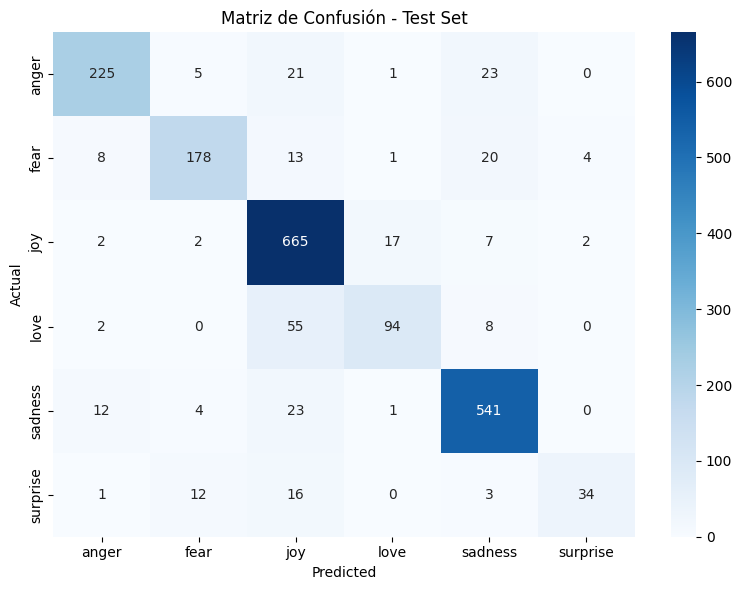

In [10]:
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Matriz de Confusión - Test Set")
plt.tight_layout()
plt.show()

---

### Guardado de modelo y vectorizador
Guardamos el modelo y el vectorizador en disco para que la API o la interfaz 
cliente los carguen sin necesidad de reentrenar.

In [11]:
joblib.dump(model, "emotion_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

['tfidf_vectorizer.pkl']